**Author : RAJDEEP PORUA**

**Task 2 : Prediction using Unsupervised Machine Learning**

**GRIP @ The Sparks Foundation**

In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [ ]:
# loading data
try:
    iris_data = pd.read_csv('/Iris.csv')
    print("Data loaded Successfully!!\n")
    iris_data.info()
except:
    print("Can't Load data")

Data loaded Successfully!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Exploratory Analysis**

In [ ]:
# check the data by printing first 5 lines
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
iris_data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
# Let's first see the features
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


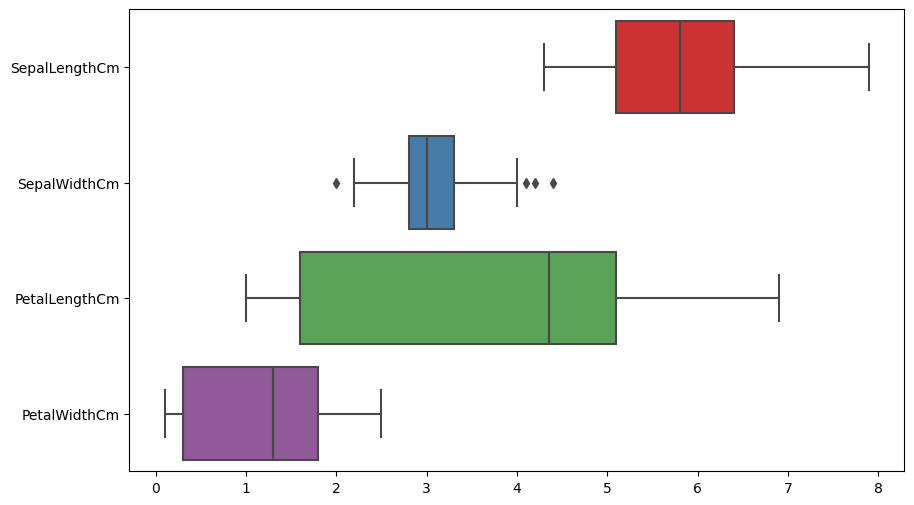

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=iris_data.drop('Id',axis=1), orient="h", palette="Set1")

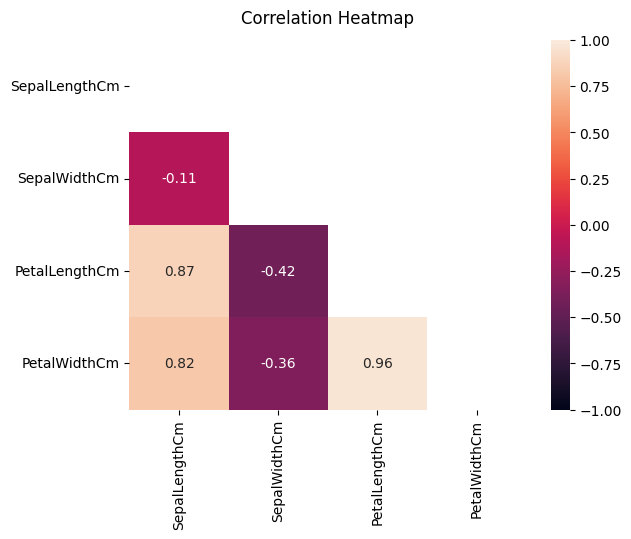

In [ ]:
# let's check correlation between numeric columns
corr = iris_data.drop('Id',axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

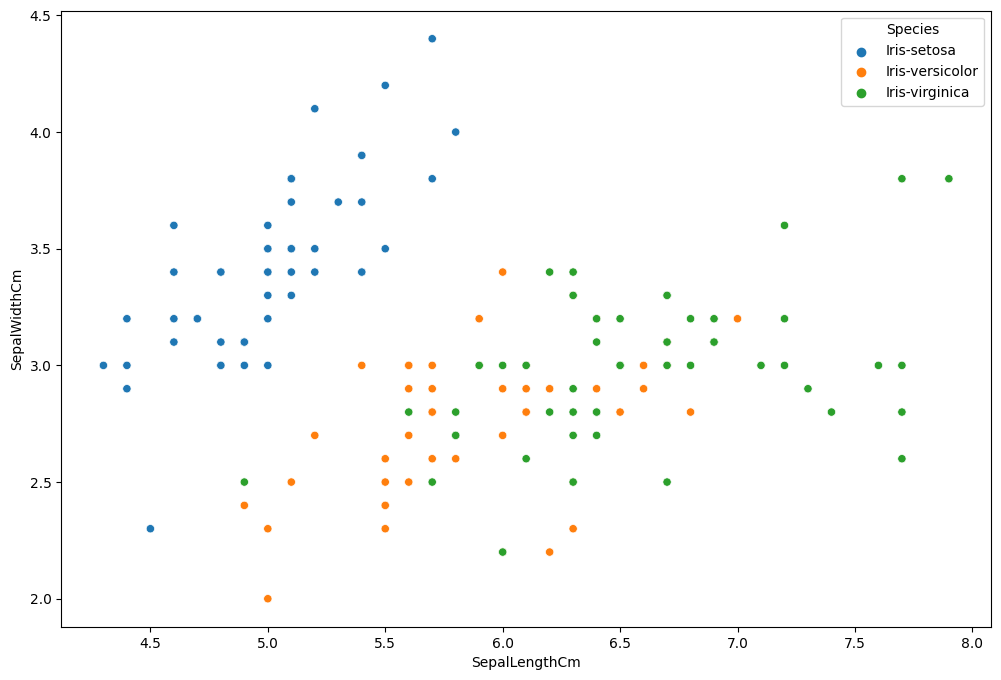

In [ ]:
# Correlation of Sepal Length-Width
plt.figure(figsize=(12,8))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=iris_data)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

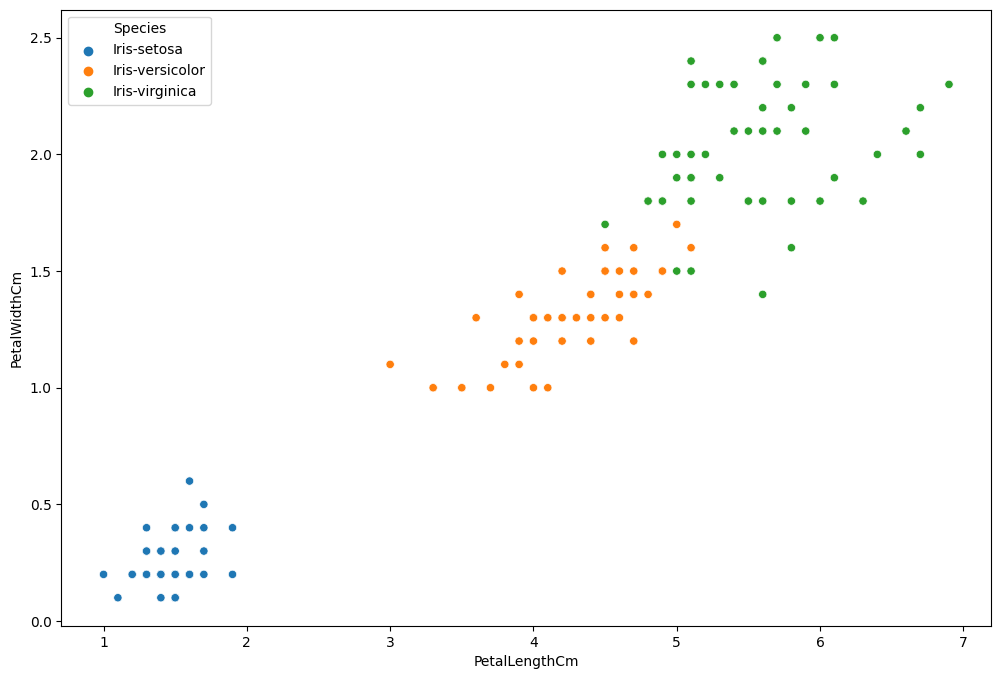

In [ ]:
# Correlation of Petal Length-Width
plt.figure(figsize=(12,8))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=iris_data)

From above Two graphs, we can see that

Sepal Length and Width have low correlation

Petal Length and Width have high correlation

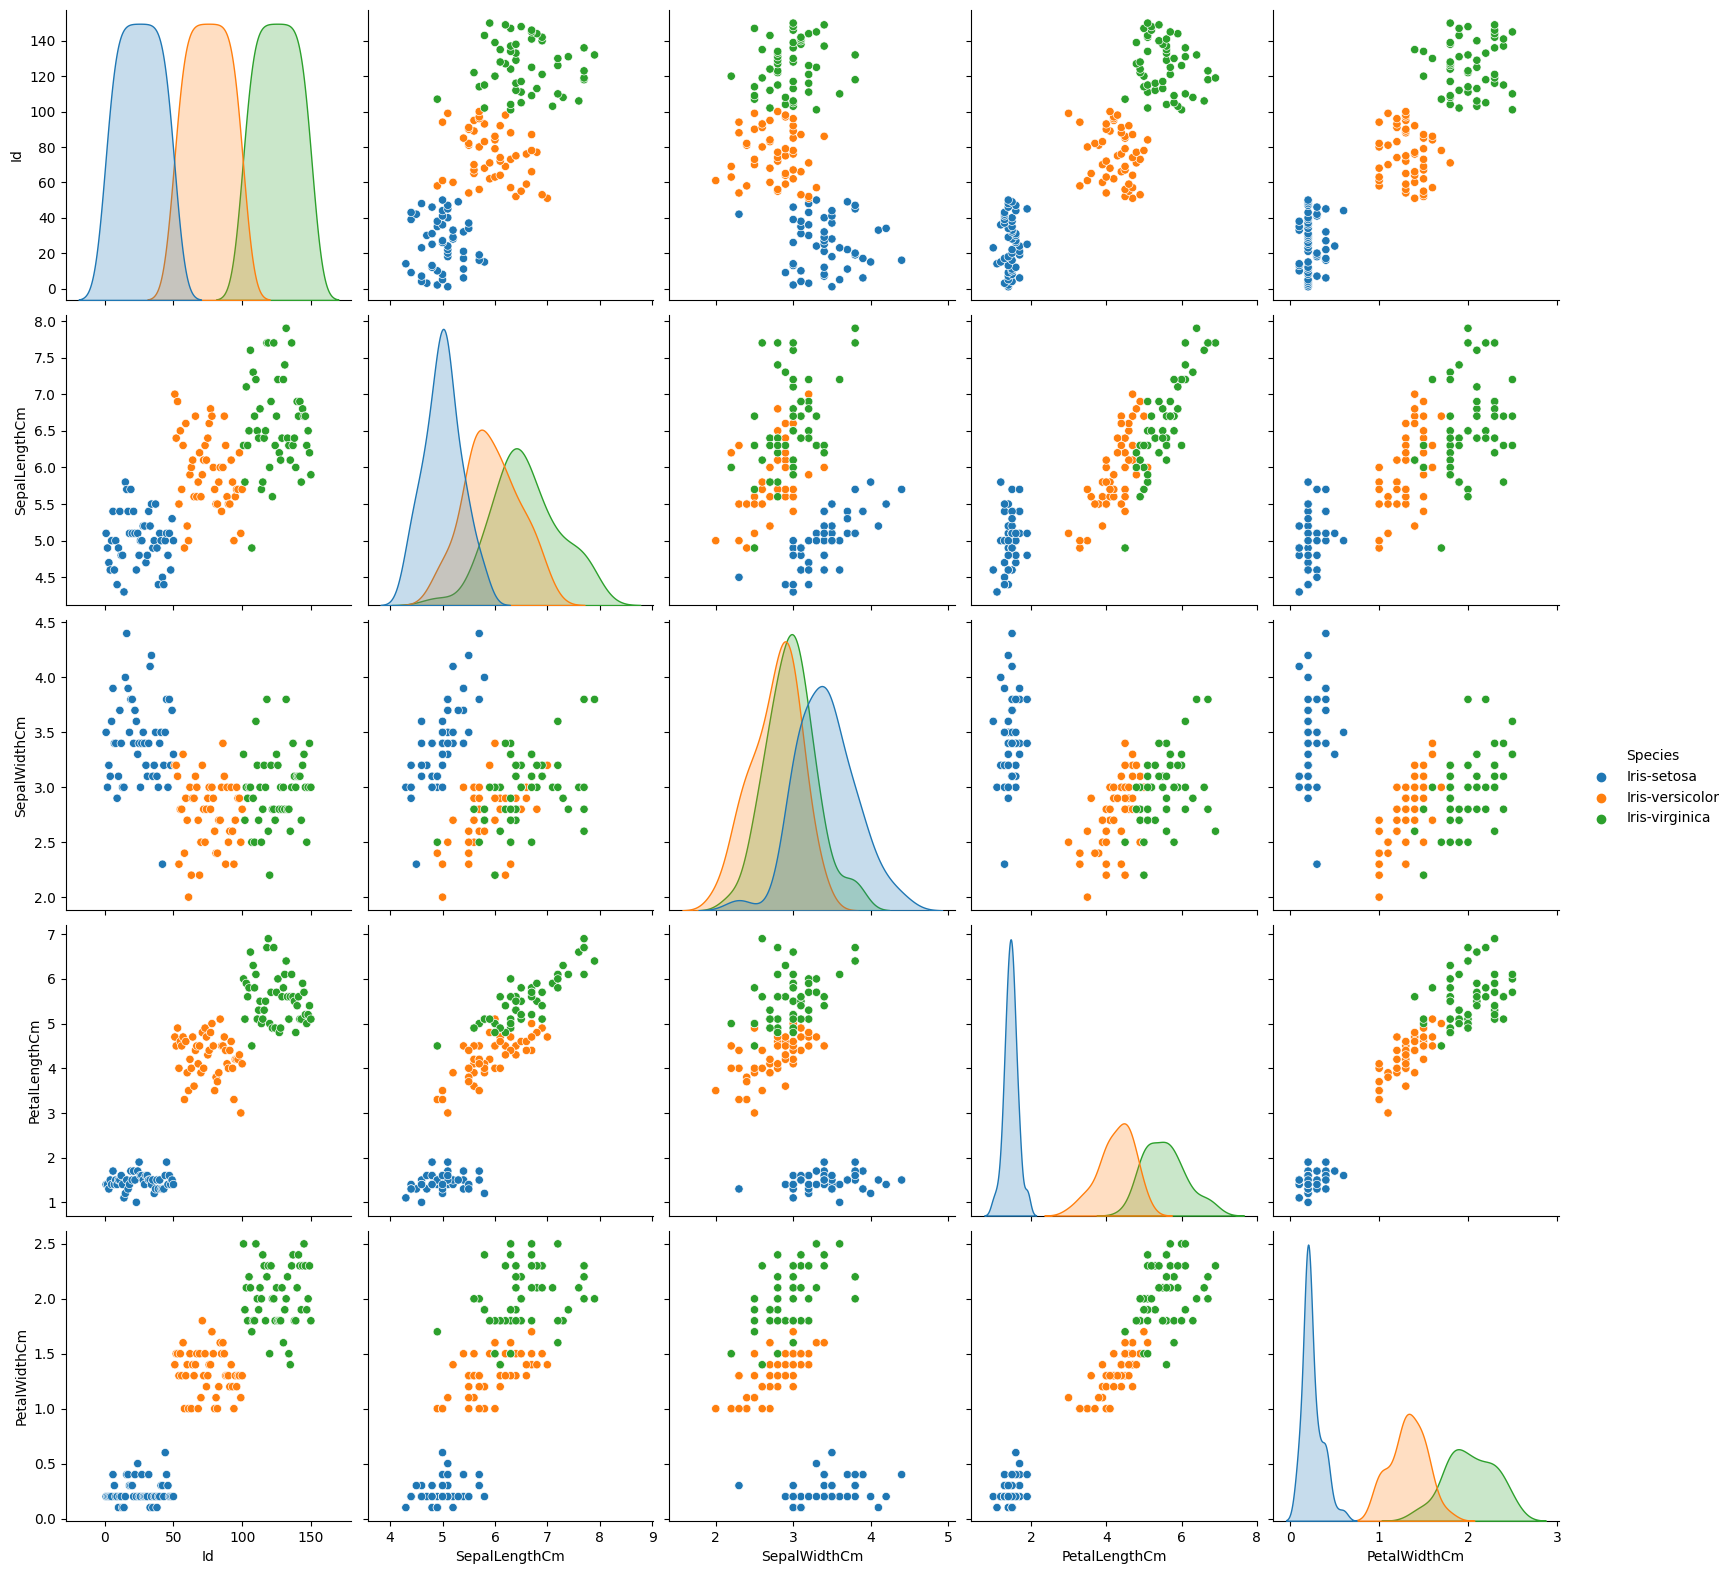

In [ ]:
# Let's bivariate relation between each pair of features by Ploting the PairPlot
sns.pairplot(iris_data, hue="Species", size=3.2)

From the pairplot, we can see that the Iris-setosa species is separataed from the other two across all feature combinations

In [ ]:
def ViolinPlot(X,Y1,Y2,data):
  plt.figure(figsize=(15,10))
  plt.subplot(1,2,1)
  sns.violinplot(x=X,y=Y1,data=iris_data)
  plt.title(Y1)
  plt.subplot(1,2,2)
  sns.violinplot(x=X,y=Y2,data=iris_data)
  plt.title(Y2)

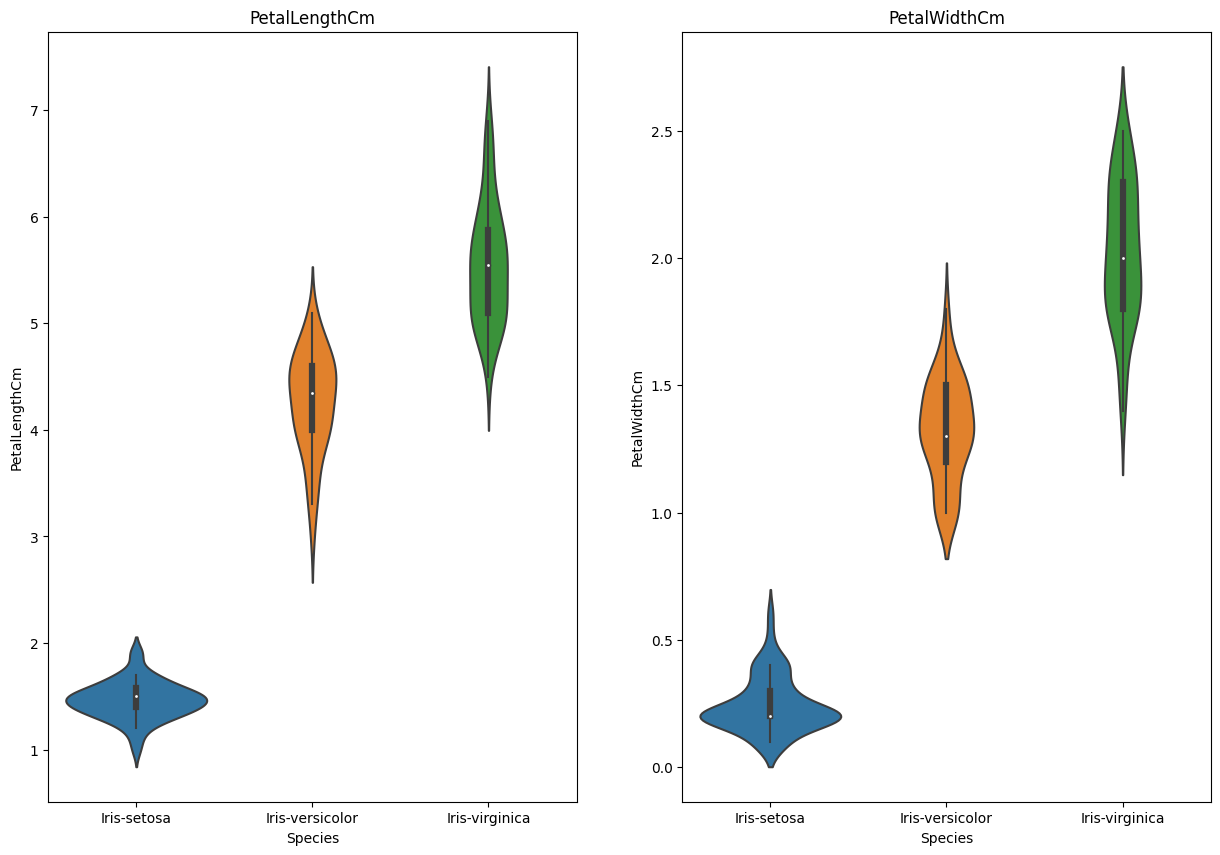

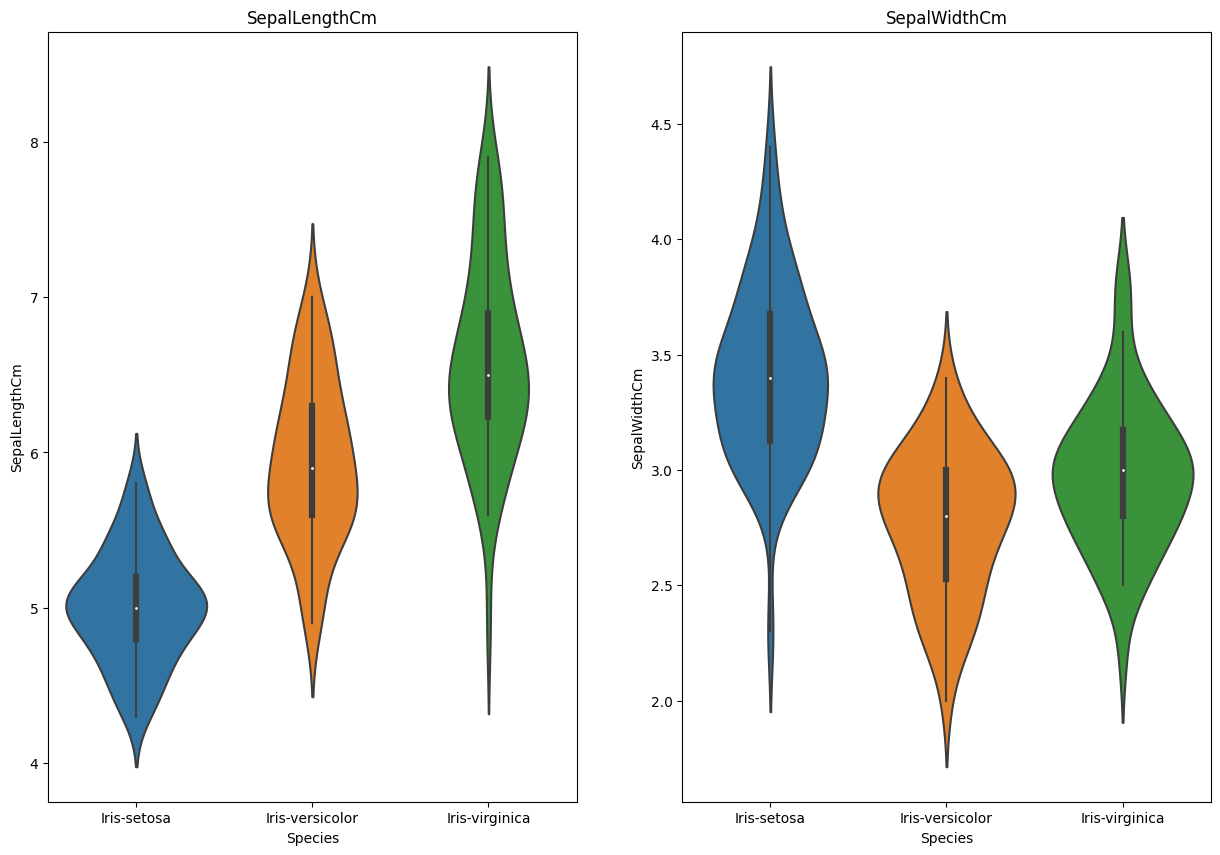

In [ ]:
ViolinPlot("Species","PetalLengthCm","PetalWidthCm",iris_data)
ViolinPlot("Species","SepalLengthCm","SepalWidthCm",iris_data)

Some Violin Plot is long, there might be outlier.

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

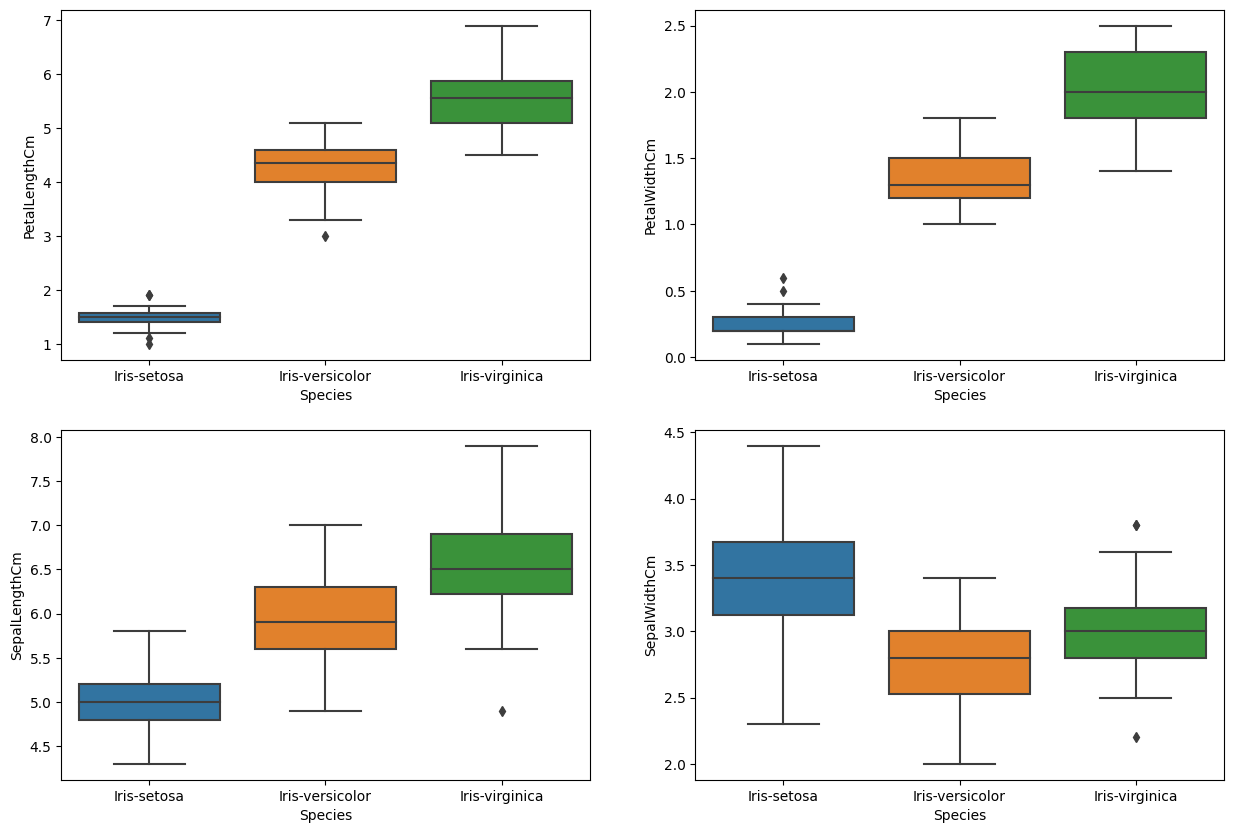

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris_data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris_data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris_data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris_data)

We can see some Outliers

**Label Encoding of Target Variable**

In [ ]:
#Label Encoding of Target Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

iris_data['Species'] = le.fit_transform(iris_data['Species'])
iris_data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

**Predicting Optimal Values for K**

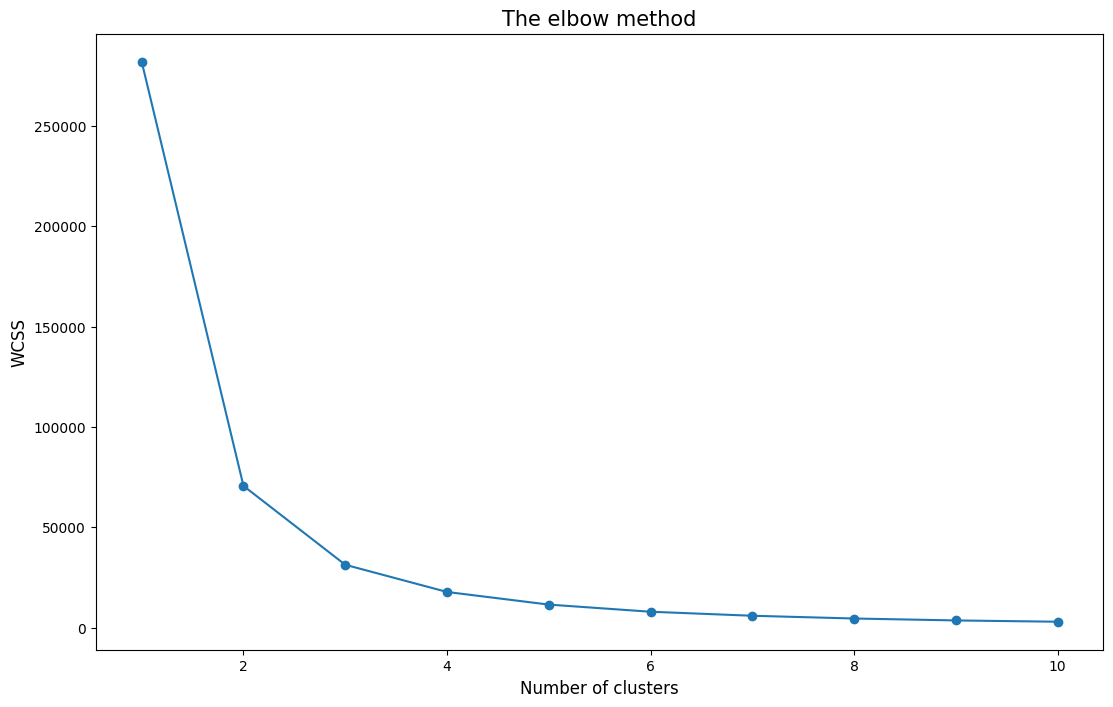

In [ ]:
# As given problem is of classification problem, we can use K-Means Algorithm for finding the Optimal k value

from sklearn.cluster import KMeans

x = iris_data.iloc[:, [0, 1, 2, 3, 4]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13,8))
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The elbow method',size=15)
plt.xlabel('Number of clusters',size=12)
plt.ylabel('WCSS',size=12) #within cluster sum of squares
plt.show()


From K= 1 to K= 2, there is large drop

From K= 2 to K= 3, there is slight drop

After K= 3, slop is almost constant

Hence, value of K=3 implies an Optimal Value of K-Clusters

In [ ]:
# Predicting the values using Kmeans Algorithm
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = kmeans.fit_predict(x)

In [ ]:
#Predicted Values
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#centroids
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])

Text(0.5, 0.98, 'Clusters w.r.t Features')

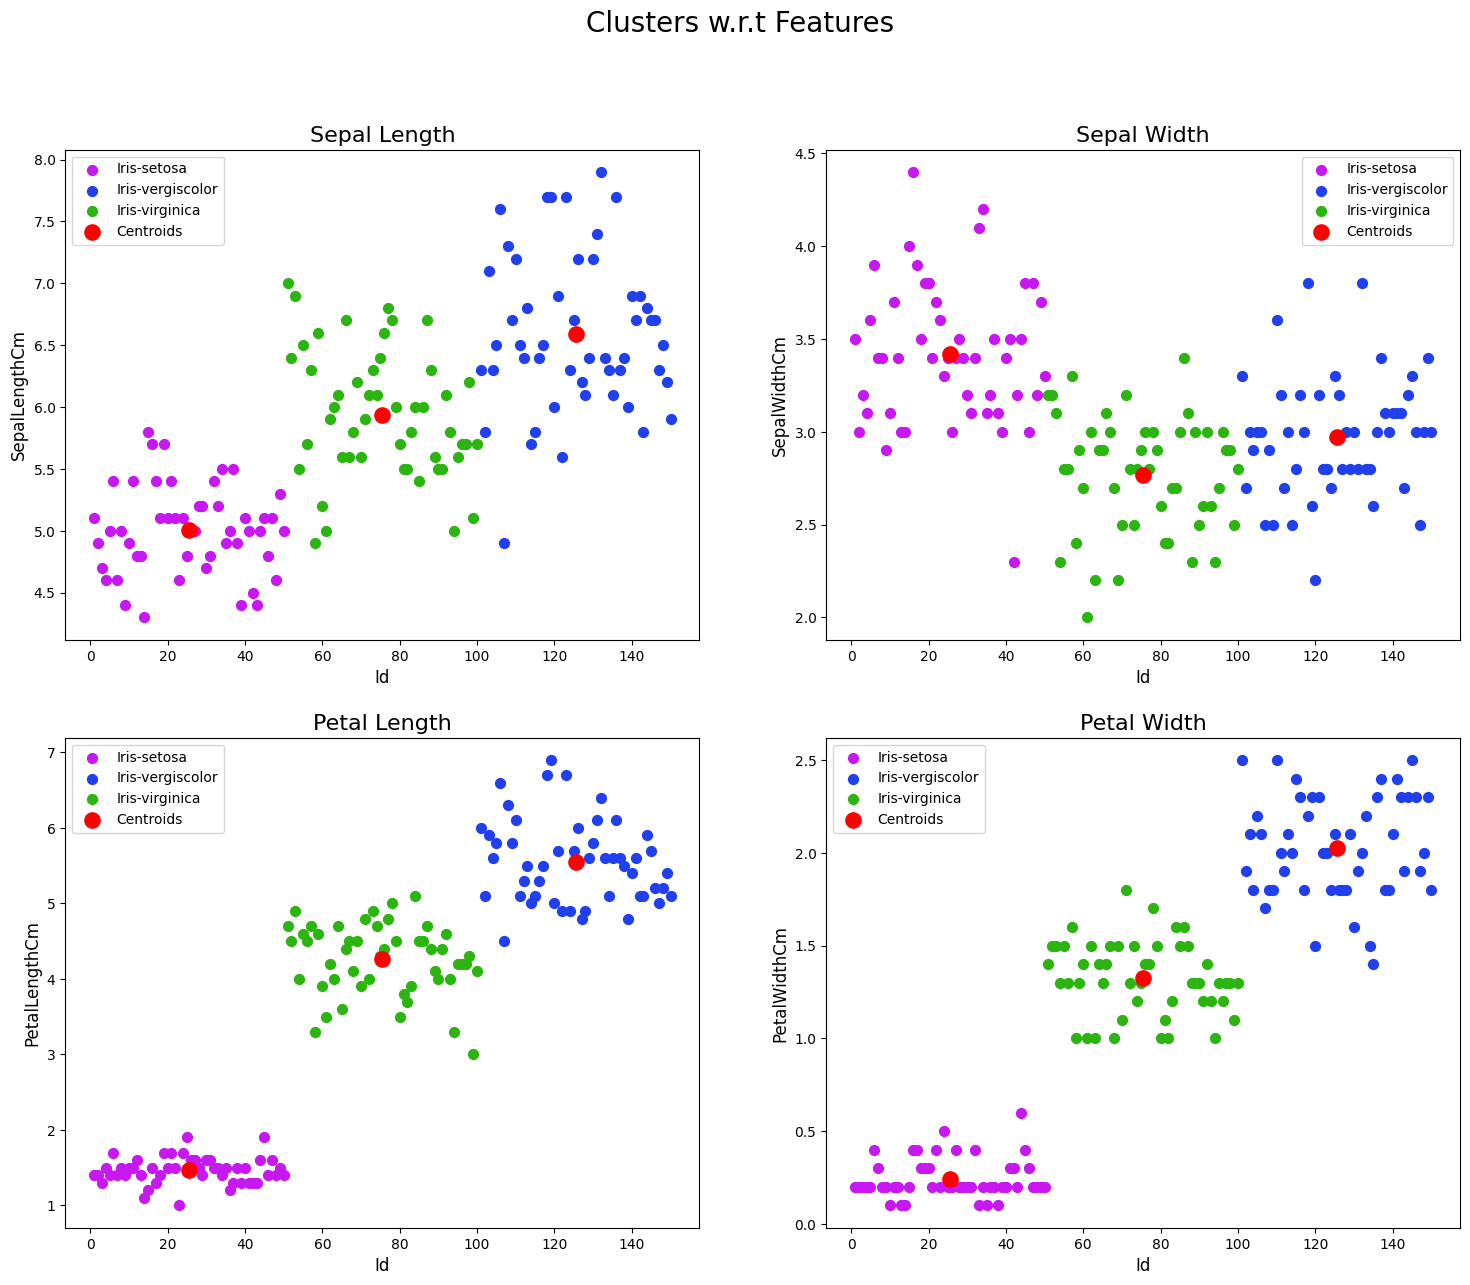

In [ ]:
#visualising the predicted clusters on basic all 4 features
Features = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
plt.figure(figsize=(18,14))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.scatter(x[predictions == 0,0], x[predictions == 0,i], s=50, c = '#c718f2', label = 'Iris-setosa' )
    plt.scatter(x[predictions == 1,0], x[predictions == 1,i], s=50, c = '#2140ed', label = 'Iris-vergiscolor' )
    plt.scatter(x[predictions == 2,0], x[predictions == 2,i], s=50, c = '#2cb510', label = 'Iris-virginica' )
    #centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,i], s = 120, c = 'red', label = 'Centroids')
    plt.title(Features[i-1],size=16)
    plt.xlabel('Id',size=12)
    plt.ylabel(iris_data.columns[i],size=12)
    plt.legend()
plt.suptitle('Clusters w.r.t Features',fontsize=20)

From above graphs and Elbow Curve, we can see at K = 3, we get Optimal Clusters.